In [50]:
import requests
import json

# Let's get the data from the Nyc taxi tlc API
url = 'https://data.cityofnewyork.us/id/2yzn-sicd.json?$limit=500000'
resp = requests.get(url)
results = json.loads(resp.text)

In [51]:
import pandas as pd
df=pd.DataFrame(results)      
df=df[df['ratecodeid']!="99"]            #Data Cleaning
df.head(5)

,dropoff_datetime,dropoff_latitude,dropoff_longitude,extra,fare_amount,imp_surcharge,mta_tax,passenger_count,payment_type,pickup_datetime,pickup_latitude,pickup_longitude,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,trip_distance,vendor_id
0,2015-08-28T21:24:00.000,40.783340454101563,-73.978713989257812,0.5,8,0.3,0.5,1,1,2015-08-28T21:16:16.000,40.800395965576172,-73.969154357910156,1,N,1.85,0,11.15,1.4,1
1,2015-08-26T18:28:45.000,40.741180419921875,-74.007484436035156,1,15,0.3,0.5,1,2,2015-08-26T18:08:10.000,40.762615203857422,-73.992477416992188,1,N,0,0,16.8,2.2,1
2,2015-08-10T18:42:15.000,40.764690399169922,-73.958717346191406,1,7.5,0.3,0.5,1,1,2015-08-10T18:34:51.000,40.743915557861328,-73.973526000976563,1,N,2.3,0,11.6,1.6,1
3,2015-08-29T02:20:38.000,40.721397399902344,-73.983627319335938,0.5,7,0.3,0.5,1,2,2015-08-29T02:12:55.000,40.727550506591797,-74.001358032226563,1,N,0,0,8.3,1,1
4,2015-08-10T11:26:09.000,40.742374420166016,-73.984672546386719,0,8,0.3,0.5,1,1,2015-08-10T11:17:45.000,40.755565643310547,-73.993232727050781,1,N,1.75,0,10.55,1.4,1


In [4]:
#Setting the correct datatypes to each column
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"],infer_datetime_format=True)
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"],infer_datetime_format=True)
df["passenger_count"] = pd.to_numeric(df["passenger_count"])
df['trip_distance'] = df['trip_distance'].astype('float64')
df['pickup_latitude'] = df['pickup_latitude'].astype('float64') 
df['pickup_longitude'] = df['pickup_longitude'].astype('float64') 
df['dropoff_latitude'] = df['dropoff_latitude'].astype('float64') 
df['dropoff_longitude'] = df['dropoff_longitude'].astype('float64') 

In [5]:
import re
import time
import datetime
from datetime import date

In [6]:
def dayofweek(dattime):
    formatted = dattime.weekday()
    return formatted

In [7]:
d=dayofweek(datetime.date(2008, 6, 23))
print(d)

0


In [8]:
df["dropoff_day"]=list(map(dayofweek,df['dropoff_datetime']))

In [9]:
df.head()

,dropoff_datetime,dropoff_latitude,dropoff_longitude,extra,fare_amount,imp_surcharge,mta_tax,passenger_count,payment_type,pickup_datetime,pickup_latitude,pickup_longitude,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,trip_distance,vendor_id,dropoff_day
0,2015-08-28 21:24:00,40.783340,-73.978714,0.5,8,0.3,0.5,1,1,2015-08-28 21:16:16,40.800396,-73.969154,1,N,1.85,0,11.15,1.4,1,4
1,2015-08-26 18:28:45,40.741180,-74.007484,1,15,0.3,0.5,1,2,2015-08-26 18:08:10,40.762615,-73.992477,1,N,0,0,16.8,2.2,1,2
2,2015-08-10 18:42:15,40.764690,-73.958717,1,7.5,0.3,0.5,1,1,2015-08-10 18:34:51,40.743916,-73.973526,1,N,2.3,0,11.6,1.6,1,0
3,2015-08-29 02:20:38,40.721397,-73.983627,0.5,7,0.3,0.5,1,2,2015-08-29 02:12:55,40.727551,-74.001358,1,N,0,0,8.3,1.0,1,5
4,2015-08-10 11:26:09,40.742374,-73.984673,0,8,0.3,0.5,1,1,2015-08-10 11:17:45,40.755566,-73.993233,1,N,1.75,0,10.55,1.4,1,0


In [10]:
import plotly.plotly as py                              #You will have to install plotly
py.sign_in('bhaveshvasa', 'gUd6VhH5bX1GcGRly5u7')         #signing to the plotly api
import plotly.graph_objs as go
import seaborn.apionly as sns 
%matplotlib inline 
import matplotlib.pyplot as plt

In [11]:
data=df["ratecodeid"]        #Filtering by ratecodeid

In [12]:
import pandas as pd
# import colorlover as cl
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go

In [13]:
df['ratecodeid'].value_counts()            #Value counts for each ratecodid

1    485560
2     11751
5      1574
3       857
4       243
6         6
Name: ratecodeid, dtype: int64

In [14]:
# Bar graph condfiguration
#df['ratecodeid'].value_counts()
trace0 = go.Bar(
    x=['Standard Rate', 'JFK', 'Negotiated Fare', 'Newark','Nassau','Group ride'],
    y=df['ratecodeid'].value_counts(),
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='distribution of cab rides',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')


In [15]:
#Pie chart is better in this case because you can easily see that there are 2.35% of cabs that are going to the airport JFK
fig = {
    'data': [{'labels': ['Standard Rate', 'JFK', 'Negotiated Fare', 'Newark','Nassau','Group Ride'],
              'values': df['ratecodeid'].value_counts(),
              'type': 'pie'}],
    'layout': {'title': 'Percentage Rate'}
     }


py.iplot(fig)

In [16]:
# Flights going to the airport JFK and Newark
air_df=df.ix[(df['ratecodeid'] =="2") | (df['ratecodeid']=="3")]

In [17]:
air_df

,dropoff_datetime,dropoff_latitude,dropoff_longitude,extra,fare_amount,imp_surcharge,mta_tax,passenger_count,payment_type,pickup_datetime,pickup_latitude,pickup_longitude,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,trip_distance,vendor_id,dropoff_day
62,2015-08-21 09:32:54,40.643826,-73.783234,0,52,0.3,0.5,1,1,2015-08-21 09:00:03,40.756428,-73.972771,2,N,0,5.54,58.34,16.90,2,4
71,2015-08-09 15:15:40,40.644020,-73.782829,0,52,0.3,0.5,1,1,2015-08-09 14:35:38,40.781658,-73.958420,2,N,8.66,5.54,67,18.74,2,6
85,2015-08-29 16:57:54,40.764267,-73.958626,0,52,0.3,0.5,5,1,2015-08-29 16:23:26,40.665173,-73.790253,2,N,14.58,5.54,72.92,18.25,2,5
102,2015-08-26 17:31:13,40.732231,-74.007713,0,52,0.3,0.5,1,1,2015-08-26 16:39:27,40.644772,-73.781860,2,N,5,5.54,63.34,19.31,2,2
148,2015-08-09 05:32:40,40.647465,-73.787827,0,52,0.3,0.5,1,1,2015-08-09 05:02:29,40.793297,-73.967262,2,N,11.65,5.54,69.99,19.40,1,6
214,2015-08-27 06:41:21,40.644897,-73.776672,0,52,0.3,0.5,1,1,2015-08-27 06:12:43,40.721096,-73.984100,2,N,10,5.54,68.34,18.40,1,3
249,2015-08-23 23:00:13,40.782398,-73.958588,0,52,0.3,0.5,1,1,2015-08-23 22:21:17,40.644711,-73.781921,2,N,11.67,5.54,70.01,19.42,2,6
288,2015-08-20 07:58:09,40.768661,-73.984917,0,52,0.3,0.5,5,2,2015-08-20 07:04:04,40.644680,-73.781822,2,N,0,5.54,58.34,19.34,2,3
386,2015-08-03 04:55:43,40.646851,-73.790237,0,52,0.3,0.5,1,1,2015-08-03 04:35:04,40.750050,-73.972633,2,N,11.65,5.54,69.99,16.30,1,0
463,2015-08-23 22:20:57,40.729637,-73.974724,0,52,0.3,0.5,2,2,2015-08-23 21:31:17,40.645123,-73.776840,2,N,0,0,52.8,19.00,1,6


In [17]:
air_df.dtypes

dropoff_datetime      datetime64[ns]
dropoff_latitude             float64
dropoff_longitude            float64
extra                         object
fare_amount                   object
imp_surcharge                 object
mta_tax                       object
passenger_count                int64
payment_type                  object
pickup_datetime       datetime64[ns]
pickup_latitude              float64
pickup_longitude             float64
ratecodeid                    object
store_and_fwd_flag            object
tip_amount                    object
tolls_amount                  object
total_amount                  object
trip_distance                float64
vendor_id                     object
dropoff_day                    int64
dtype: object

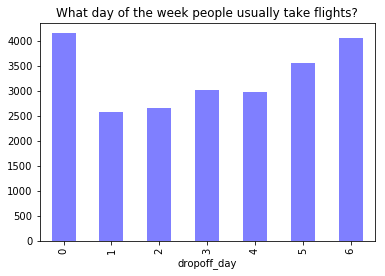

In [18]:
#number of passengers travelling to the airport on the day of the week
x1=air_df.groupby('dropoff_day').passenger_count.sum()
x1.plot(kind='bar', 
       alpha=0.5,  
       color='Blue',
      title="What day of the week people usually take flights?",
      )

In [20]:
ax = sns.countplot(x="dropoff_day", data=air_df)       #You will have to install seaborn for this
fig_mpl = ax.get_figure()
py.iplot_mpl(fig_mpl)

C:\Users\Bhavesh\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



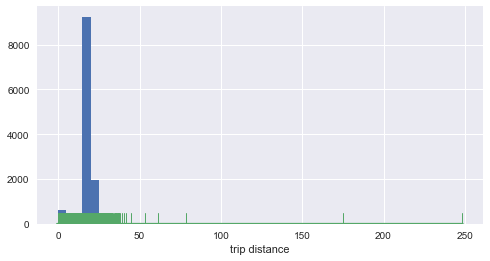

In [44]:
#distances travelled by the cabs. This takes some time to visiualize
x=pd.Series(air_df['trip_distance'],name="trip distance")
sns.set(rc={"figure.figsize": (8, 4)})
air_df['trip_distance'].hist(bins=50)
sns.distplot(x,rug=True)
# x

In [20]:
air_df['passenger_count'].value_counts()

1    7851
2    2425
5     737
3     709
6     470
4     416
Name: passenger_count, dtype: int64

In [21]:
layout = go.Layout(
    title='Density of cabs vs passenger_count',
    font=dict(
        size=16
    ),
    radialaxis=dict(
        ticksuffix='.'
    ),
    orientation=270
)

In [52]:
data = []
counter = 0
data.append(
go.Area(t=['1','2','5','3','6','4'],      #For efficiency and constraint on plotly
r=air_df['passenger_count'].value_counts(),
marker=dict(color='rgb(106,81,163)'),
name='ratecodeid' ) )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='new-polar-area-chart')

In [23]:
import re
import itertools
from time import strftime,gmtime

In [24]:
def mapReduce(mapper, reducer, data_list, ordered = True):
    #MAP
    map_result = list(map(mapper, data_list))
#     print(map_result)
    result = [itm_result for itm_result in map_result]
#     print(result)
    #SORT and GROUP BY KEY
    result.sort()
    time_groups = itertools.groupby(result, lambda x: x[0])
#     print(time_groups)
    #REDUCE
    
    result = list()
    for key,group in time_groups:
        res = reducer(key, group)
        for r in res:
            result.append(r)
    #FINAL SORT
    if ordered:
        result.sort()
    
    return result

In [25]:
def mapper(h):
#     print(date1)
#     h=strftime("%H",date1)
#     h=date1.hour
#     print(h)
    if h<4 and h>=0:
        return ('late_night',1)
    if h<8 and h>=4:
        return ('early_morning',1)
    if h<12 and h>=8:
        return ('morning',1)
    if h<16 and h>=12:
        return ('afternoon',1)
    if h<20 and h>=16:
        return ('evening',1)
    if h<24 and h>=20:
        return ('night',1)
        
def reducer(key,values):
    result_sum = 0
    for value in values:
        result_sum += value[1]
    yield (key, result_sum)

In [26]:
strftime("%H",gmtime())

'19'

In [27]:
result = mapReduce(mapper, reducer, list(air_df.dropoff_datetime.dt.hour))

In [105]:
# list(air_df.dropoff_datetime.dt.hour)

In [28]:
print(result)

[('afternoon', 2947), ('early_morning', 1429), ('evening', 3432), ('late_night', 789), ('morning', 1873), ('night', 2138)]


In [38]:
import numpy as np

def plot_density_timeofday(result):
    result.sort(key=lambda x: x[1], reverse=True) 
    time_of_day=[x[0] for x in result]
    # print(time_of_day)
    number_of_cabs=[x[1] for x in result]
    x_pos=np.arange(len(time_of_day))

    # calculate slope and intercept for the linear trend line
    slope, intercept = np.polyfit(x_pos, number_of_cabs, 1)
    trendline = intercept + (slope * x_pos)

    plt.plot(x_pos, trendline, color='red', linestyle='--') 
    plt.title('What time do people prefer taking the flight?')
    plt.bar(x_pos, number_of_cabs,align='center')
    plt.xticks(x_pos, time_of_day) 
    plt.ylabel('Number of Cabs')
    plt.show()

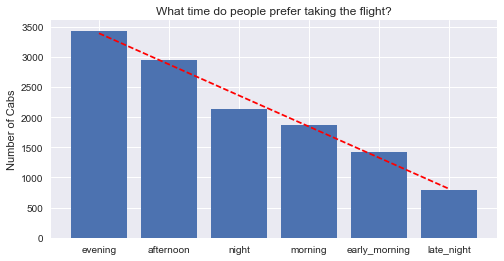

In [39]:
plot_density_timeofday(result)

In [30]:
odd = air_df.loc[air_df.pickup_longitude==0, ['pickup_longitude', 'pickup_latitude']]   #More Data Cleaning
odd
air_df = air_df.drop(odd.index)

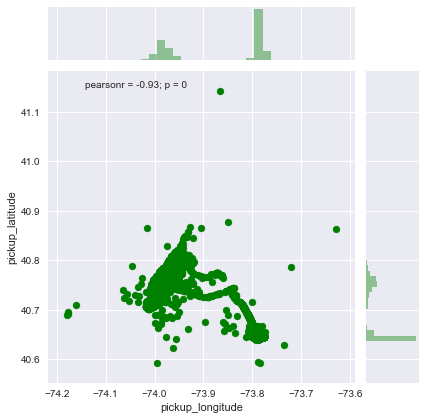

In [31]:
 g=sns.jointplot(x="pickup_longitude", y="pickup_latitude", data=air_df, color='g')

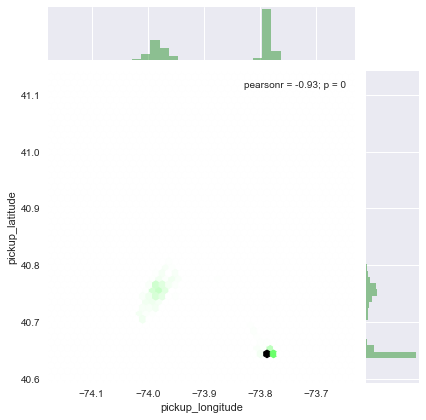

In [45]:
 g=sns.jointplot(x="pickup_longitude", y="pickup_latitude", data=air_df, color='g',kind='hex')

In [32]:
air_df.dtypes

dropoff_datetime      datetime64[ns]
dropoff_latitude             float64
dropoff_longitude            float64
extra                         object
fare_amount                   object
imp_surcharge                 object
mta_tax                       object
passenger_count                int64
payment_type                  object
pickup_datetime       datetime64[ns]
pickup_latitude              float64
pickup_longitude             float64
ratecodeid                    object
store_and_fwd_flag            object
tip_amount                    object
tolls_amount                  object
total_amount                  object
trip_distance                float64
vendor_id                     object
dropoff_day                    int64
dtype: object

In [36]:
monday_data=air_df.loc[df['dropoff_day'] == 0]

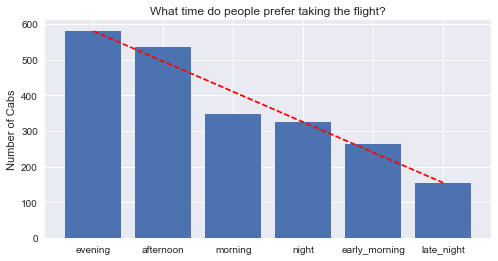

In [41]:
m_result = mapReduce(mapper, reducer, list(monday_data.dropoff_datetime.dt.hour))
plot_density_timeofday(m_result)

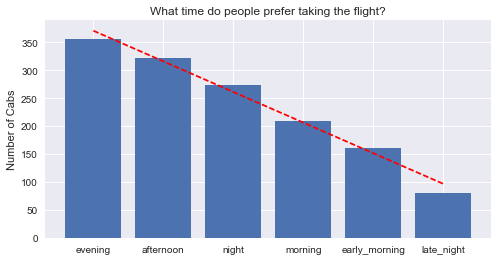

In [43]:
tuesday_data=air_df.loc[df['dropoff_day'] == 1]
t_result = mapReduce(mapper, reducer, list(tuesday_data.dropoff_datetime.dt.hour))
plot_density_timeofday(t_result)